In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv('/Users/priyanshpatel/Desktop/codsoft/customer churn/Churn_Modelling 2.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
df['NumOfProducts'].describe()

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: NumOfProducts, dtype: float64

In [17]:
df['Geography'].describe()

count      10000
unique         3
top       France
freq        5014
Name: Geography, dtype: object

In [18]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [19]:
df=df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [20]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


/var/folders/64/m_40qk0x1s5g07xxhjly0qp00000gn/T/ipykernel_72527/1553267130.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


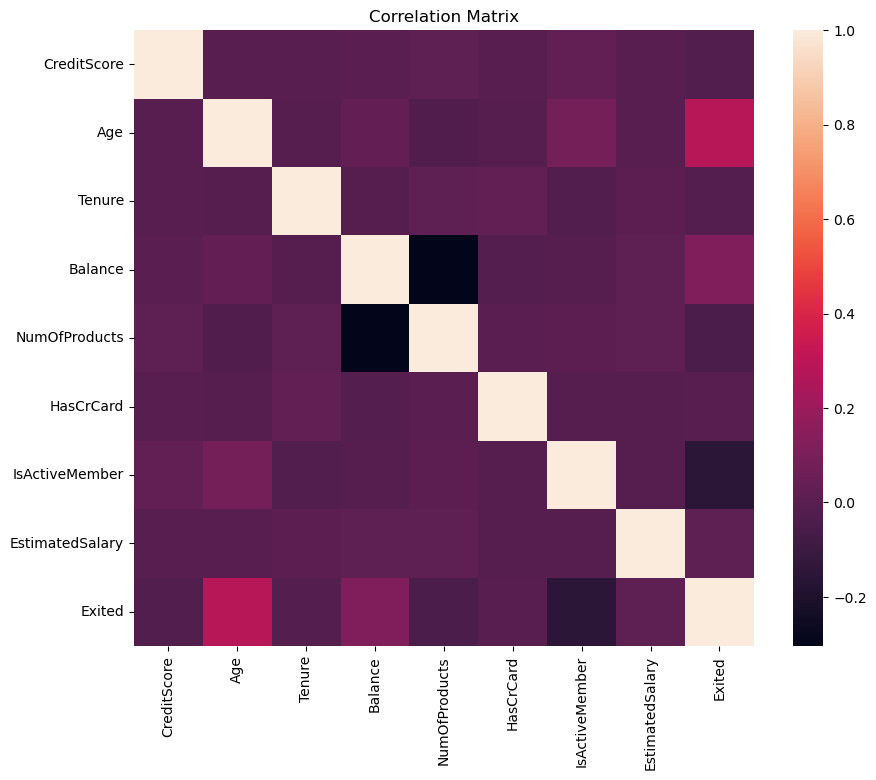

In [28]:

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr())
plt.title('Correlation Matrix')
plt.show()

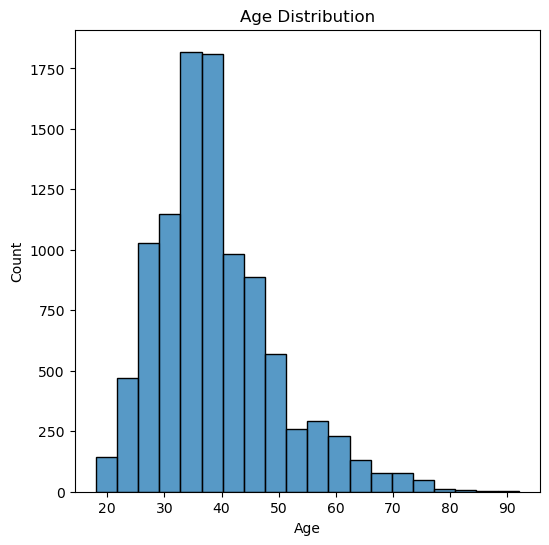

In [23]:
plt.figure(figsize=(6, 6))
sns.histplot(df['Age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

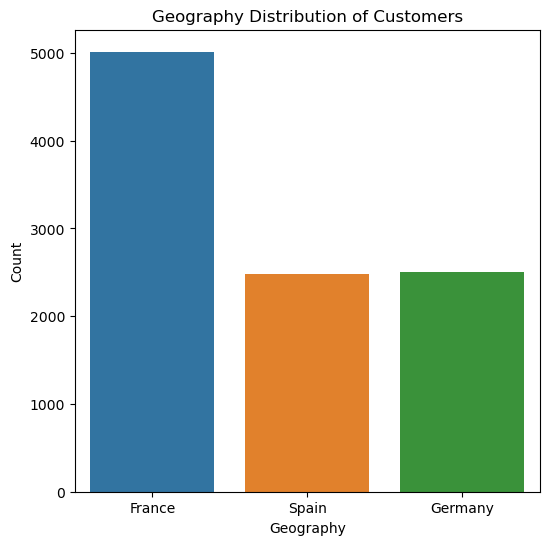

In [24]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Geography')
plt.title('Geography Distribution of Customers')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

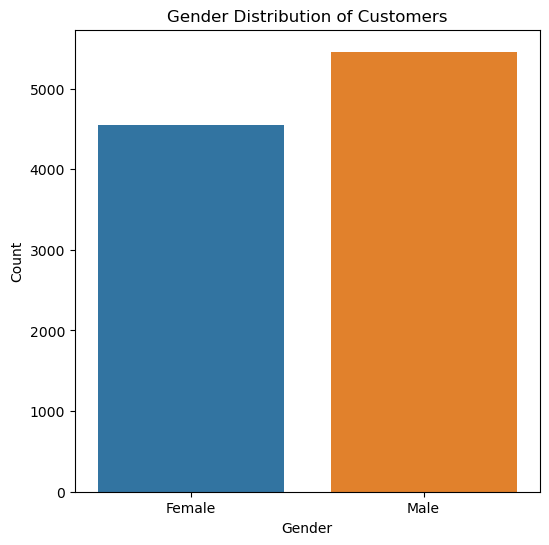

In [25]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

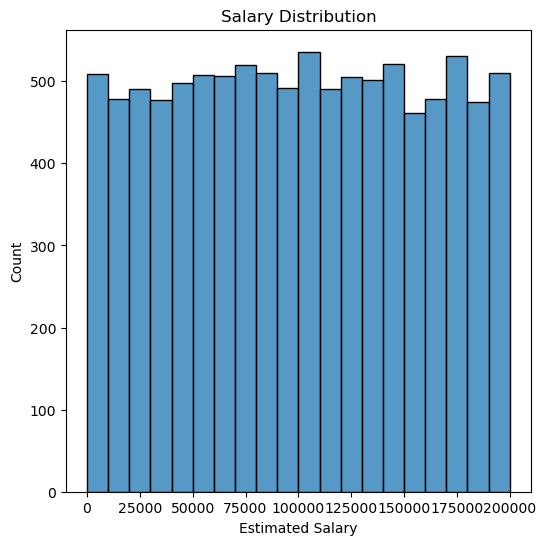

In [27]:
plt.figure(figsize=(6, 6))
sns.histplot(df['EstimatedSalary'],bins=20)
plt.title('Salary Distribution')
plt.xlabel('Estimated Salary')
plt.ylabel('Count')
plt.show()

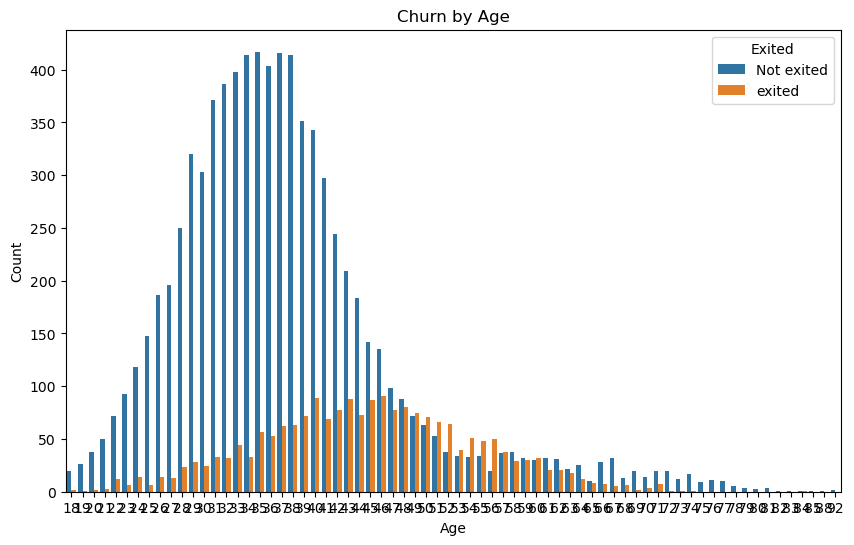

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age', hue='Exited')
plt.title('Churn by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['Not exited', 'exited'])
plt.show()

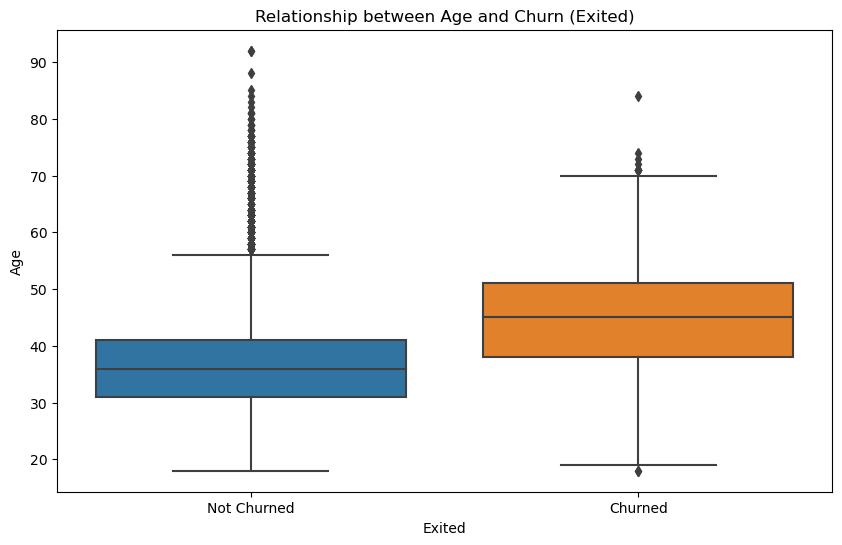

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Age', data=df)
plt.title('Relationship between Age and Churn (Exited)')
plt.xlabel('Exited')
plt.ylabel('Age')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

In [35]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_features = ['Geography','Gender']
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

In [37]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [44]:
X=df.drop(['Exited'],axis=1)
y=df['Exited']


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
regressor = LogisticRegression()
regressor.fit(X_train,y_train)

LogisticRegression()

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [55]:
y_pred1 = regressor.predict(X_test)

In [56]:
accuracy_score(y_test, y_pred)

0.7855

In [57]:
confusion_matrix(y_test, y_pred)

array([[1554,   31],
       [ 398,   17]])

In [58]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
y_pred2 = rf.predict(X_test)

In [62]:
accuracy_score(y_test, y_pred2)

0.8635

In [63]:
confusion_matrix(y_test, y_pred2)

array([[1541,   44],
       [ 229,  186]])

In [64]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [65]:
y_pred3 = gb.predict(X_test)

In [66]:
accuracy_score(y_test, y_pred3)

0.864

In [67]:
confusion_matrix(y_test, y_pred3)

array([[1538,   47],
       [ 225,  190]])